In [1]:
pip install requests matplotlib wordcloud pandas

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: autogenes 1.0.4 has a non-standard dependency specifier matplotlib>=3.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of autogenes or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


Random Dog Facts:
1: The most intelligent dogs are reportedly the Border Collie and the Poodle, while the least intelligent dogs are the Afghan Hound and the Basenji.
2: Dogs have three eyelids, including one to keep their eyes moist and protected.
3: The French Bulldog is incapable of reproducing naturally.
4: Pit bulls have been given a bad rap. BADRAP was started in the San Francisco Bay area on behalf of "pit bulls and their people" and was ranked nationally as a No. 1 high-impact nonprofit for animal welfare.
5: President Theodore Roosevelt's Bull Terrier Pete ripped the pants off French Ambassador Jules Jusserand.
6: Dogs have a ligament in the neck which allows them to conserve energy while running long distances following scent trails with their nose to the ground. Many other species have a similar ligament and it is called a Paddywhack.
7: New puppies have heat sensors in their noses to help find their moms while their eyes and ears are closed.
8: Chocolate contains a substanc

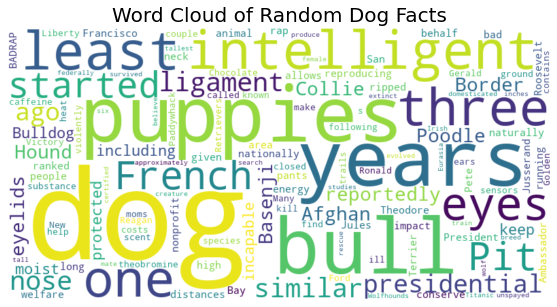

In [2]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# make function to fetch random dog facts
def fetch_random_dog_facts(num_facts):
    facts = []
    for _ in range(num_facts):
        response = requests.get('https://dog-api.kinduff.com/api/facts')
        if response.status_code == 200:
            facts.append(response.json()['facts'][0])
        else:
            print("Error fetching data from API.")
    return facts

# fetch random dog facts
num_facts = 15
dog_facts = fetch_random_dog_facts(num_facts)

# display the fetched facts
print("Random Dog Facts:")
for i, fact in enumerate(dog_facts):
    print(f"{i + 1}: {fact}")

# create a dataframe
df_dog_facts = pd.DataFrame(dog_facts, columns=['Dog Facts'])
df_dog_facts.index += 1

# create a word cloud
wordcloud_text = ' '.join(dog_facts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Random Dog Facts", fontsize=20)
plt.show()